In [1]:
import pandas as pd
import seaborn as sns

In [2]:
class Dynamics():
    """
        15/04/23
    """
    def __init__(self):
        path = r'../../../data/2019-Nov.csv'
        self.df = pd.read_csv(
            path,
            sep=',',
            decimal='.',
            date_parser=['Date'],
        )

    def dataframe(self):
        df = self.df.head()
        display(df)

    def tipos(self):
        df = self.df.dtypes
        display(df)

    def estatística_dos_dados(self):
        df = self.df.describe().round(decimals=2)
        display(df)

    def tamanho_do_dataframe(self): 
        df = self.df.shape
        display(df)

    def verificando_valores_nulos(self):
        df = self.df.isnull().sum()
        display(df)

    def contagem_valores_de_duplicados_por_coluna(self):
        df = self.df.apply(lambda x: x.duplicated()).sum()
        display(df)

    def removendo_valores_nulos(self):
        self.df = self.df.dropna()

    def removendo_duplicatas(self):
        self.df = self.df.drop_duplicates()

    def agrupando(self):
        self.df_agrupado = (
                self.df[['user_session','event_type','product_id','event_time']]
                .groupby('user_session')
                .count()
                .reset_index()
            )
        
        display(self.df_agrupado)

    def transformando_a_coluna_event_time_para_datetime(self):
        self.df['event_time'] = pd.to_datetime(
            arg=self.df['event_time'],
            format='%Y-%m-%d %H:%M:%S UTC'
        )

    def calculando_quartis(self):
        percentiles = [.01, .10, .25, .50, .75, .99]
        df = self.df.describe(percentiles=percentiles).round(decimals=2)
        display(df)

    def calculando_quartis_entre_75_a_25(self):
        df = self.df
        q1 = df['price'].quantile(0.25)
        q3 = df['price'].quantile(0.75)
        iqr = q3 - q1

        df['price'] = df['price'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)
        sns.boxplot(
            x=df['price']
        )

    def calcular_lower_bound_de_25(self):
        pass

    def calcular_upper_bound_de_75(self):
        pass

    def comparar_valores_com_o_descri_percentiles_de_todos_os_valores_calculados(self):
        pass

if __name__ == '__main__':
    dynamics = Dynamics()

In [3]:
dynamics.dataframe()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [4]:
dynamics.tipos()

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [5]:
dynamics.estatística_dos_dados()

,product_id,category_id,price,user_id
count,99999.00,9.999900e+04,99999.00,9.999900e+04
mean,5472866.58,1.544516e+18,8.54,5.033069e+08
std,1329275.84,1.578448e+17,19.96,8.313584e+07
min,3762.00,1.487580e+18,-7.94,1.311745e+07
25%,5724678.00,1.487580e+18,1.90,4.700687e+08
50%,5812043.00,1.487580e+18,3.97,5.399051e+08
75%,5857855.00,1.487580e+18,6.75,5.653610e+08
max,5900879.00,2.195085e+18,299.81,5.665739e+08


In [6]:
dynamics.tamanho_do_dataframe()

(99999, 9)

In [7]:
dynamics.verificando_valores_nulos()

event_time           0
event_type           0
product_id           0
category_id          0
category_code    98385
brand            39082
price                0
user_id              0
user_session        44
dtype: int64

In [8]:
dynamics.contagem_valores_de_duplicados_por_coluna() 

event_time       54293
event_type       99995
product_id       81812
category_id      99555
category_code    99988
brand            99784
price            98706
user_id          86850
user_session     77948
dtype: int64

In [9]:
dynamics.removendo_valores_nulos()

In [10]:
dynamics.removendo_duplicatas()

In [11]:
dynamics.tamanho_do_dataframe()

(1180, 9)

In [12]:
dynamics.agrupando()

,user_session,event_type,product_id,event_time
0,00633c93-c459-452f-9324-ed12d9bbdd69,2,2,2
1,01515de5-463d-4cbe-a9b8-1f61dcab1bdd,7,7,7
2,01f6ea82-5bbf-49a2-9975-2181f342c9c1,1,1,1
3,021f1fe4-7c45-442a-ab8e-0a2880ead6e4,3,3,3
4,02d35457-bc3d-4865-8512-5468f4bb6033,1,1,1
...,...,...,...,...
562,fde9a562-f06e-45a0-88cd-528d20039359,3,3,3
563,fe14c5f3-60cd-4363-a577-ce29ca523f1c,2,2,2
564,feda20dc-3c36-4eb2-b638-a46e7e56c67d,1,1,1
565,ff56cb25-aae1-4f1c-bd69-e7c904b966a8,1,1,1


In [13]:
dynamics.transformando_a_coluna_event_time_para_datetime()

In [14]:
dynamics.tipos()

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [15]:
dynamics.calculando_quartis()

,product_id,category_id,price,user_id
count,1180.00,1.180000e+03,1180.00,1.180000e+03
mean,5428589.32,1.596411e+18,38.04,5.071139e+08
std,1449719.49,2.387652e+17,38.54,8.416228e+07
min,5395.00,1.487580e+18,0.94,1.192125e+08
1%,5395.00,1.487580e+18,1.27,2.341362e+08
10%,5712697.00,1.487580e+18,1.98,3.940487e+08
25%,5749199.00,1.487580e+18,2.94,4.846737e+08
50%,5823935.00,1.487580e+18,24.44,5.441903e+08
75%,5861762.00,1.487580e+18,63.33,5.646261e+08
99%,5892333.63,2.193075e+18,150.79,5.665380e+08


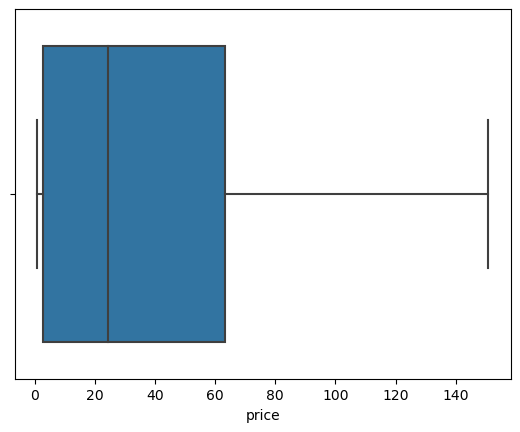

In [16]:
dynamics.calculando_quartis_entre_75_a_25()